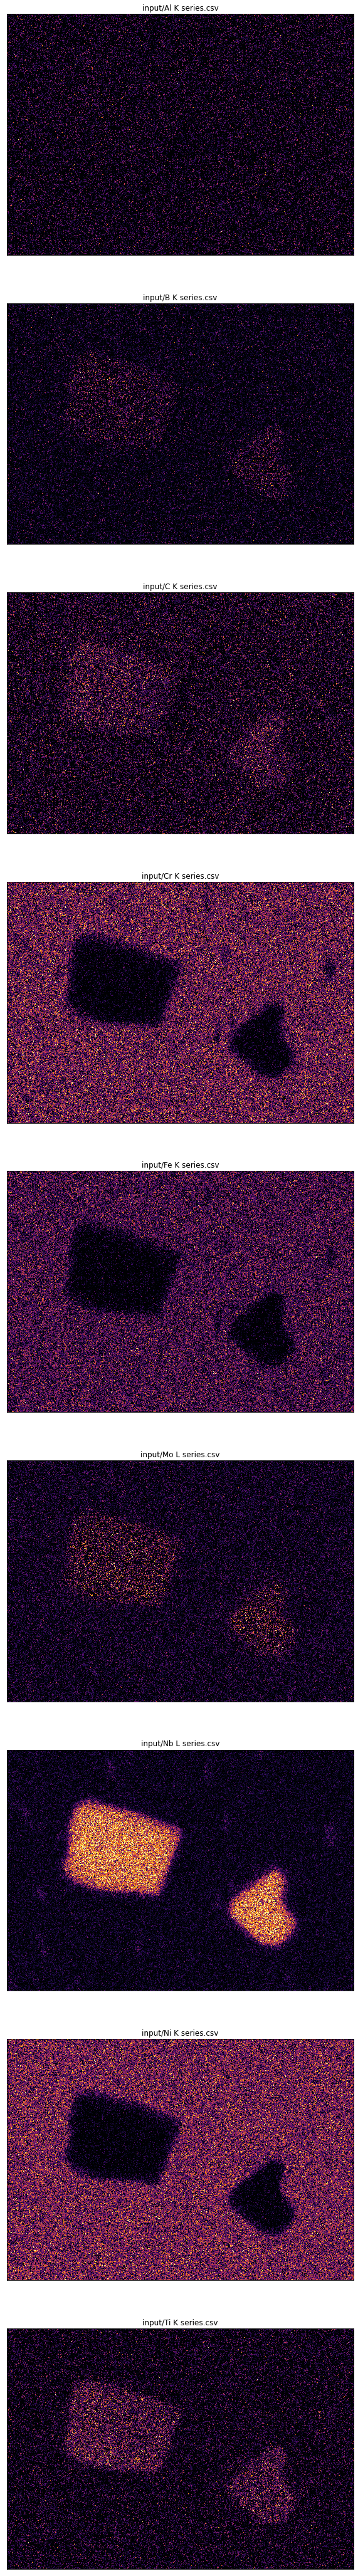

In [134]:
# -*- coding: utf-8 -*-
"""
Created on Wed Oct 05 17:16:03 2022
@author: felixtheska
"""

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
from scipy import ndimage


# Getting map text files in folder of choice
Maps = glob.glob('input/*.csv')
ColorMaps = pd.read_csv('elements_colormap.csv', delimiter=',')
Scale = 100


# Reading the data from files
def Read_Data(File_Name):
    Data = pd.read_csv(File_Name, delimiter=',', header=None).fillna(0)
    return Data


# Generating the maps
def Map_Series(Series, Scale):
    fig = plt.figure(figsize=(10,75))
    gs = fig.add_gridspec(int(len(Series)))
    axs = gs.subplots(sharex=True, sharey=True)
    for itr, File in enumerate(Series):
        Map = Read_Data(File)
        PlotMap = axs[itr].imshow(Map, vmin=0, vmax=(Map.to_numpy().max())/5, cmap=Scale) 
        axs[itr].title.set_text(Series[itr])
        axs[itr].get_xaxis().set_visible(False)
        axs[itr].get_yaxis().set_visible(False)
        figure = plt.figure()
        #print(Series[itr].replace('input', 'export'))
        figure.savefig(Series[itr].replace('input', 'export') + '.svg')
        plt.close()
        
        
# Generating and exporting element maps 
Map_Series(Maps, Scale='inferno')